In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns

In [2]:
df_22 = pd.read_csv('../../state_NY_22.csv')

C:\Users\nikod\AppData\Local\Temp\ipykernel_16508\3171511996.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22 = pd.read_csv('../../state_NY_22.csv')


In [3]:
df = df_22.drop(columns=[
'applicant_age_above_62','co-applicant_age_above_62',
    'aus-2', 'aus-3', 'aus-4', 'aus-5',
    'denial_reason-2', 'denial_reason-3','denial_reason-4', 
    'activity_year', 'total_points_and_fees','county_code',
    'lei', 'multifamily_affordable_units', 'prepayment_penalty_term', 'state_code',
    'applicant_race-1','applicant_race-2', 'applicant_race-3','applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4','co-applicant_race-5', 'co-applicant_race_observed', 'co-applicant_sex_observed', 'applicant_race_observed' ,'co-applicant_race-1', 'co-applicant_sex',
    'applicant_sex','applicant_sex_observed',
    'applicant_ethnicity-1','applicant_ethnicity-2','applicant_ethnicity-3', 'applicant_ethnicity-4','applicant_ethnicity-5','applicant_ethnicity_observed', 'co-applicant_ethnicity-1','co-applicant_ethnicity-2', 'co-applicant_ethnicity-3','co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'co-applicant_ethnicity_observed', 
    'construction_method',
    'lien_status','loan_type',
    'ffiec_msa_md_median_family_income', 'derived_msa-md',
    'tract_one_to_four_family_homes', 'submission_of_application', 'occupancy_type', 'other_nonamortizing_features', 
    'derived_msa-md',
    'discount_points', 'lender_credits', 'intro_rate_period',
    'co-applicant_credit_score_type', 'co-applicant_age',
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              545678 non-null  float64
 1   conforming_loan_limit                     542121 non-null  object 
 2   derived_loan_product_type                 548905 non-null  object 
 3   derived_dwelling_category                 548905 non-null  object 
 4   derived_ethnicity                         548905 non-null  object 
 5   derived_race                              548905 non-null  object 
 6   derived_sex                               548905 non-null  object 
 7   action_taken                              548905 non-null  int64  
 8   purchaser_type                            548905 non-null  int64  
 9   preapproval                               548905 non-null  int64  
 10  loan_purpose        

In [4]:
obj_columns = df.select_dtypes(include=['object'])
obj_columns

,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,loan_term,property_value,total_units,debt_to_income_ratio,applicant_age
0,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Joint,NaN,NaN,NaN,NaN,NaN,300,125000.0,1,>60%,45-54
1,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,265000.0,1,NaN,8888
2,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,1,NaN,8888
3,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,4,NaN,8888
4,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,1175000.0,1,NaN,8888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,6.75,NaN,NaN,NaN,360,275000.0,2,NaN,8888
548901,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,4,NaN,8888
548902,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,1,NaN,8888
548903,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,1435000.0,1,NaN,8888


## Object features casting ##

In [5]:
num_columns = list(filter(lambda col: (df[col] == 'Exempt').any(), obj_columns))
cat_columns = list(filter(lambda col: not (df[col] == 'Exempt').any(), obj_columns))
num_columns, cat_columns

(['loan_to_value_ratio',
  'interest_rate',
  'rate_spread',
  'total_loan_costs',
  'origination_charges',
  'loan_term',
  'property_value',
  'debt_to_income_ratio'],
 ['conforming_loan_limit',
  'derived_loan_product_type',
  'derived_dwelling_category',
  'derived_ethnicity',
  'derived_race',
  'derived_sex',
  'total_units',
  'applicant_age'])

In [6]:
df.replace(
{'debt_to_income_ratio': { #replacement with mean of interval
    '<20%': 0.1,
    '20%-<30%': 0.25,
    '30%-<36%': 0.33,
    '36': 0.36,
    '37': 0.37,
    '38': 0.38,
    '39': 0.39,
    '40': 0.40,
    '41': 0.41,
    '42': 0.42,
    '43': 0.43,
    '44': 0.44,
    '45': 0.45,
    '46': 0.46,
    '47': 0.47,
    '48': 0.48,
    '49': 0.49,
    '50%-60%': 0.55,
    '>60%': 0.8
},
 
   'applicant_age': {
       '<25': 18,
       '25-34': 30,
       '35-44': 39,
       '45-54': 49,
       '55-64': 59,
       '65-74': 69,
       '>74': 79,
       '8888': np.nan
},
 
 'total_loan_costs': {np.nan: 0.},
 'origination_charges': {np.nan: 0.},
 'loan_term':{'Exempt': 0},
 'denial_reason-1': {1111: 11}
}, inplace=True
)


# df_no_exempt[num_columns] = df_no_exempt[num_columns].apply(pd.to_numeric)
# df_no_exempt = df_no_exempt[df_no_exempt['denial_reason-1'] != 1111]

#todo: replace object categorical variables with int64 numbers (0,1..n)

In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              545678 non-null  float64
 1   conforming_loan_limit                     542121 non-null  object 
 2   derived_loan_product_type                 548905 non-null  object 
 3   derived_dwelling_category                 548905 non-null  object 
 4   derived_ethnicity                         548905 non-null  object 
 5   derived_race                              548905 non-null  object 
 6   derived_sex                               548905 non-null  object 
 7   action_taken                              548905 non-null  int64  
 8   purchaser_type                            548905 non-null  int64  
 9   preapproval                               548905 non-null  int64  
 10  loan_purpose        

In [8]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

14.04: Further cleanup

1.Dropping rows with not filled applicant_age

In [9]:
df = df[df['applicant_age'].notna()]
df

,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,...,applicant_credit_score_type,applicant_age,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_median_age_of_housing_units
0,3.600505e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Joint,3,0,2,...,8,49.0,1,6,1,2142,32.31,109,339,70
109,NaN,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Sex Not Available,3,0,2,...,9,39.0,1,6,7,0,0.00,0,0,0
141,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,2,0,2,...,3,59.0,1,6,10,5698,36.17,244,693,40
142,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,...,1,69.0,1,6,10,6180,19.71,292,711,0
143,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,2,0,2,...,1,49.0,1,6,10,5698,36.17,244,693,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548896,3.606102e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,3,0,2,...,2,30.0,1,6,4,5127,93.21,54,51,67
548897,3.610316e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,3,0,2,...,2,39.0,1,6,1,8067,22.47,94,2163,27
548898,3.610320e+10,NC,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,0,2,...,2,49.0,1,6,1,1941,21.48,159,724,33
548899,3.608107e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,Race Not Available,Male,3,0,2,...,2,49.0,1,6,4,5423,97.49,110,864,63


2.Dropping rows with nan

In [10]:
from typing import List

columns_to_drop_nan: List[str] = [
    'conforming_loan_limit',
    'census_tract',
    'loan_term',
    'income',
    'denial_reason-1'
]

df.dropna(subset=columns_to_drop_nan, inplace=True)
df

,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,...,applicant_credit_score_type,applicant_age,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_median_age_of_housing_units
0,3.600505e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Joint,3,0,2,...,8,49.0,1,6,1,2142,32.31,109,339,70
141,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,2,0,2,...,3,59.0,1,6,10,5698,36.17,244,693,40
142,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,...,1,69.0,1,6,10,6180,19.71,292,711,0
143,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,2,0,2,...,1,49.0,1,6,10,5698,36.17,244,693,40
144,3.606100e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,...,3,59.0,1,6,10,2989,57.51,284,208,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548896,3.606102e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,3,0,2,...,2,30.0,1,6,4,5127,93.21,54,51,67
548897,3.610316e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,3,0,2,...,2,39.0,1,6,1,8067,22.47,94,2163,27
548898,3.610320e+10,NC,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,0,2,...,2,49.0,1,6,1,1941,21.48,159,724,33
548899,3.608107e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,Race Not Available,Male,3,0,2,...,2,49.0,1,6,4,5423,97.49,110,864,63


In [11]:
assert not df[columns_to_drop_nan].isnull().values.any(), "NaN values still exist in columns_to_drop_nan"
column_with_nan = df.columns[df.isna().any()].tolist()

for col in column_with_nan:
    print(col)

loan_to_value_ratio
interest_rate
rate_spread
property_value
debt_to_income_ratio


3.Convert types of string & int to int

In [12]:
df['loan_term'] = df['loan_term'].astype(np.int64)
df['total_units'] = df['loan_term'].astype(np.int64)

4.Fill in specific missing values with the mean value of their respective columns. We may consider using linear regression, as stated below.

In [13]:
columns_to_fill_with_mean: List[str] = [
    'loan_to_value_ratio',
    'interest_rate',
    'rate_spread',
    'total_loan_costs',
    'origination_charges',
    'property_value',
    'debt_to_income_ratio'
]
    
    

# for column in columns_to_fill_with_mean:
#     df[column] = pd.to_numeric(df[column], errors='coerce')
#     mean_value = df[column].mean()
#     df[column].fillna(mean_value, inplace=True)

In [14]:
def fill_with_mean(frame, column):
    frame[column] = pd.to_numeric(frame[column], errors='coerce')
    mean_value = frame[column].mean()
    frame[column].fillna(mean_value, inplace=True)

In [15]:
# for column in columns_to_fill_with_mean:
#     assert not df[column].isnull().any(), f"Column '{column}' contains NaN values."

In [16]:
#agregate denial_reason-1 to 2 classes 1 for 10, 0 for rest
denial_reason_columns = [col for col in df.columns if col.startswith('denial_reason')]
y_10_classes = df.pop('denial_reason-1').astype(np.int64)
y = (y_10_classes == 10).astype(np.int64)
y

0         0
141       1
142       1
143       1
144       1
         ..
548896    0
548897    0
548898    0
548899    0
548904    0
Name: denial_reason-1, Length: 470026, dtype: int64

In [17]:
y_10_classes.unique()

array([ 1, 10,  4,  7,  3,  6,  5,  9,  2,  8, 11], dtype=int64)

In [18]:
y.unique()

array([0, 1], dtype=int64)

In [19]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

## Missing values complementation standarization ##
BOTH TRAIN AND TEST, BUT SEPARATELY

#### What to do with missing values? ####
+ total_loan_costs - replace with 0 - done
+ origination_charges - replace with 0 - done
+ confirming_loan_limit - drop rows with nan - done
+ census_tract - drop rows with nan - done
+ loan_term - drop rows with nan - done
+ income - drop rows with nan - done
+ loan_to_value_ratio - mean - done
+ interest_rate - mean or linear regression - done
+ rate_spread - mean or linear regression - done
+ property_value - mean or linear regression - done
+ debt_to_income_ratio - mean or linear regression - done

In [20]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
# fill missing values simpleImpute (happy way - mean, no regression for now)


categorical_columns = ['derived_loan_product_type',
 'derived_dwelling_category',
 'conforming_loan_limit',
 'derived_ethnicity',
 'derived_race',
 'derived_sex',
 'action_taken',
 'purchaser_type',
 'preapproval',
 'loan_purpose',
 'reverse_mortgage',
 'open-end_line_of_credit',
 'business_or_commercial_purpose',
 'hoepa_status',
 'negative_amortization',
 'interest_only_payment',
 'balloon_payment',
 'manufactured_home_secured_property_type',
 'manufactured_home_land_property_interest',
 'debt_to_income_ratio',
 'applicant_age',
 'initially_payable_to_institution',
 'aus-1']

categorical_nominal = ['derived_loan_product_type', 'derived_dwelling_category', 'conforming_loan_limit', 'derived_ethnicity', 'derived_race',
                      'derived_sex', 'action_taken', 'purchaser_type', 'preapproval','loan_purpose','reverse_mortgage','open-end_line_of_credit',
                      'business_or_commercial_purpose','hoepa_status', 'negative_amortization', 'interest_only_payment', 'balloon_payment',  
                      'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'initially_payable_to_institution', 'aus-1']
categorical_ordinal = ['debt_to_income_ratio', 'applicant_age']


# one hot encodeing nominal categorical features
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_nominal])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_nominal), index=df.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_nominal, axis=1)

df_encoded.info()

# df_encoded

# df_encoded['total_units'].unique()
# df_encoded.select_dtypes(include=['object'])


# minmax standarization numerical features

<class 'pandas.core.frame.DataFrame'>
Index: 470026 entries, 0 to 548904
Columns: 116 entries, census_tract to aus-1_1111
dtypes: float64(102), int64(7), object(7)
memory usage: 419.6+ MB


# IMPORTANT!!! #
+ random_state=0 wherever possible
+ all gridsearches: cv=10, n_jobs=-1, scoring='roc_auc'
+ ... in params means name of component in pipeline, it is parameter to optimize for that component (see in pum notebook or docs)
+ if metrics are not improving, try different random over/under sampling 

## Version 1, agregated classification ##

### Train - test dataset split ###

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470026 entries, 0 to 548904
Columns: 116 entries, census_tract to aus-1_1111
dtypes: float64(102), int64(7), object(7)
memory usage: 419.6+ MB


In [22]:
# TRAIN - TEST SPLIT
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split 
from sklearn.ensemble import RandomForestClassifier
# e_precision_score

X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y, test_size=0.25, stratify=y, random_state=0
)# random state 0
#train 3:1 test - may change later
X_train.shape[0], X_test.shape[0]

(352519, 117507)

### Imput means

In [23]:
for column in columns_to_fill_with_mean:
    fill_with_mean(X_train, column)
    fill_with_mean(X_test, column)

In [24]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(X_train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [25]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(X_test.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

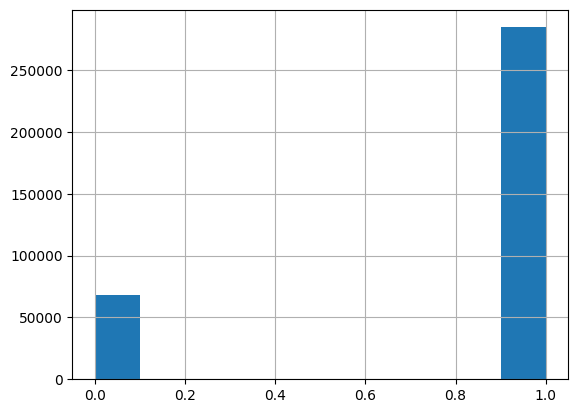

In [26]:
y_train.hist()

<Axes: >

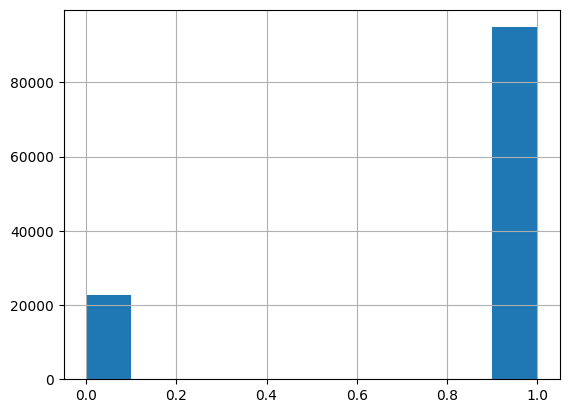

In [27]:
y_test.hist()

1. train - random undersampling of dominant class, reduce to 66%
2. train - random oversampling of minority class, double it

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, average_precision_score
# to test performance, from pum notebook
def assess_rf_performance(estimator: RandomForestClassifier, X_test, y_test) -> None:
    y_score = estimator.predict_proba(X_test)[:, 1]
    y_pred = estimator.predict(X_test)
    auroc = roc_auc_score(y_test, y_score)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)

    print(f"AUROC: {100 * auroc:.2f}%")
    print(f"F1-score: {100 * f1:.2f}%")
    print(f"accuracy: {100 * accuracy:.2f}%")
    print(f"avg precision: {100 * avg_precision:.2f}%")

In [29]:
def test_rf_performace(estimator: RandomForestClassifier,  X_train, y_train, X_test, y_test) -> None:
    print("Train metrics")
    assess_rf_performance(estimator, X_train, y_train)
    print("Test metrics")
    assess_rf_performance(estimator, X_test, y_test)


## Random oversampling & undersampling ## 

In [30]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1/4, random_state=0)
rus = RandomUnderSampler(sampling_strategy=2/3, random_state=0)


In [31]:
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Class cardinality after random oversampling')

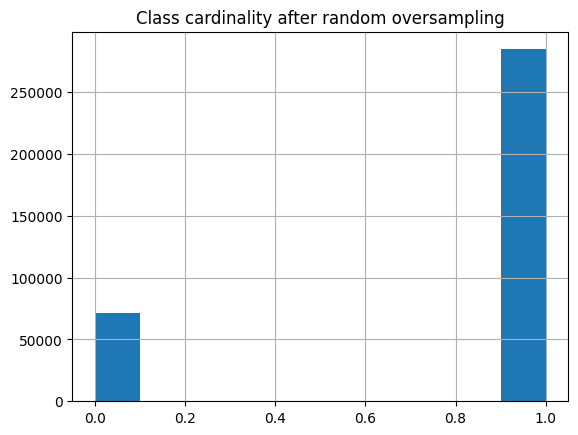

In [32]:
y_ros_train.hist()
plt.title('Class cardinality after random oversampling')

In [33]:
X_res_train, y_res_train = rus.fit_resample(X_ros_train, y_ros_train)

Text(0.5, 1.0, 'Class cardinality after random over & under sampling')

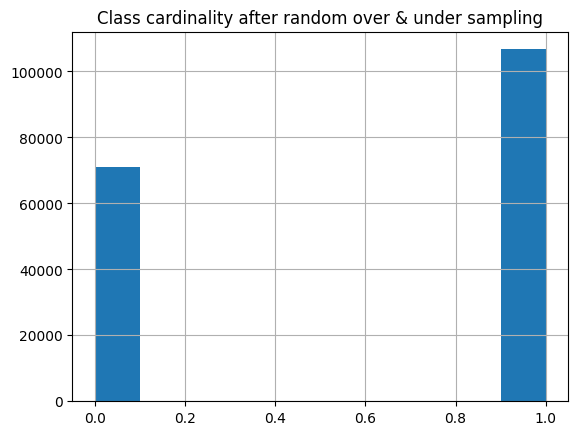

In [34]:
y_res_train.hist()
plt.title('Class cardinality after random over & under sampling')

In [35]:
rfc = RandomForestClassifier(random_state=0, n_jobs=-1)
rfc.fit(X_res_train, y_res_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [36]:
assess_rf_performance(rfc, X_test, y_test)

AUROC: 99.85%
F1-score: 99.69%
accuracy: 99.49%
avg precision: 99.82%


In [37]:
rus = RandomUnderSampler(sampling_strategy=1, random_state=0)
X_test_balanced, y_test_balanced = rus.fit_resample(X_test, y_test)

In [38]:
draw_histplot(y_test_balanced)

NameError: name 'draw_histplot' is not defined

In [39]:
assess_rf_performance(rfc, X_test_balanced, y_test_balanced)

AUROC: 99.85%
F1-score: 99.59%
accuracy: 99.59%
avg precision: 99.45%


# 10 class classification

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y_10_classes, test_size=0.25, stratify=y_10_classes, random_state=0
)# random state 0
#train 3:1 test - may change later
X_train.shape[0], X_test.shape[0]

(352519, 117507)

In [41]:
for column in columns_to_fill_with_mean:
    fill_with_mean(X_train, column)
    fill_with_mean(X_test, column)

In [42]:
def draw_histplot(data):
    plt.figure(figsize=(15, 6)) 
    sns.histplot(data=data, bins=30, binrange=(min(data), max(data)))
    plt.xlabel('Denial Reason')
    plt.ylabel('Cases')
    plt.xticks(range(1, 12))
    plt.show()

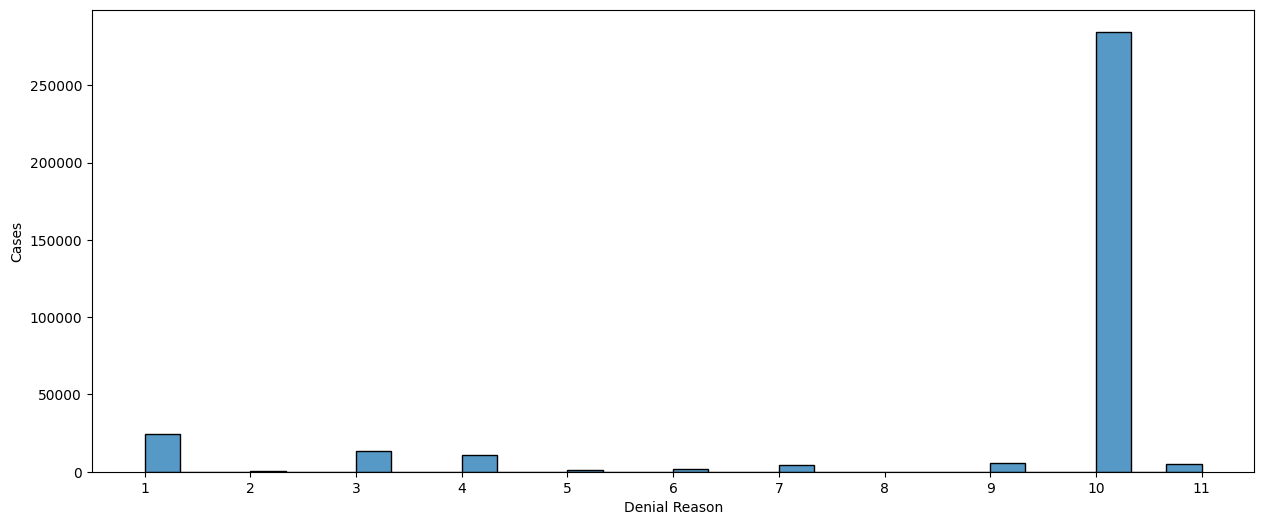

In [43]:
draw_histplot(y_train)

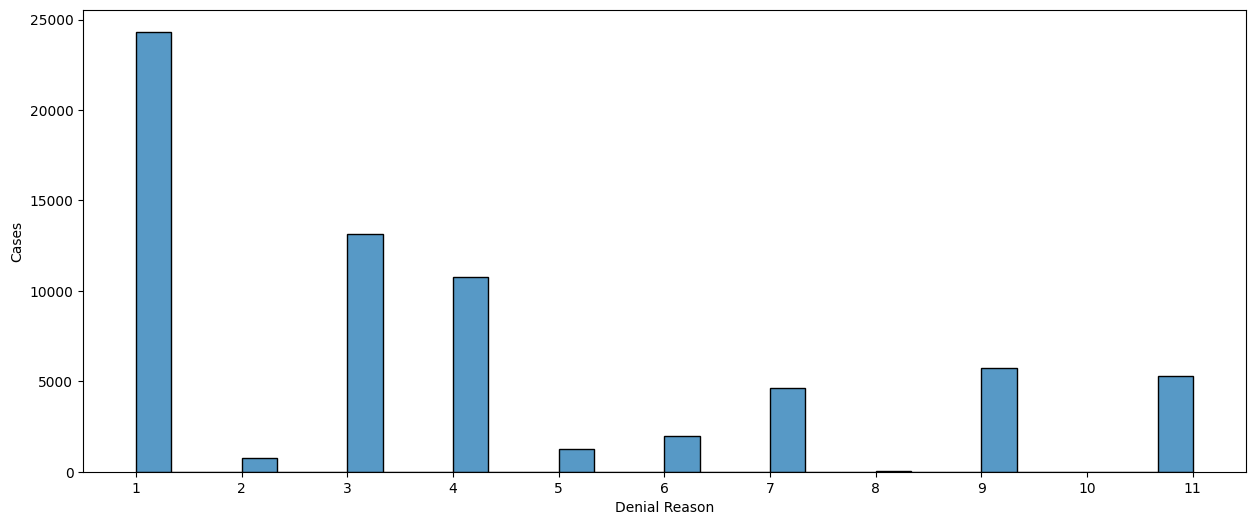

In [44]:
draw_histplot(y_train[y_train != 10])

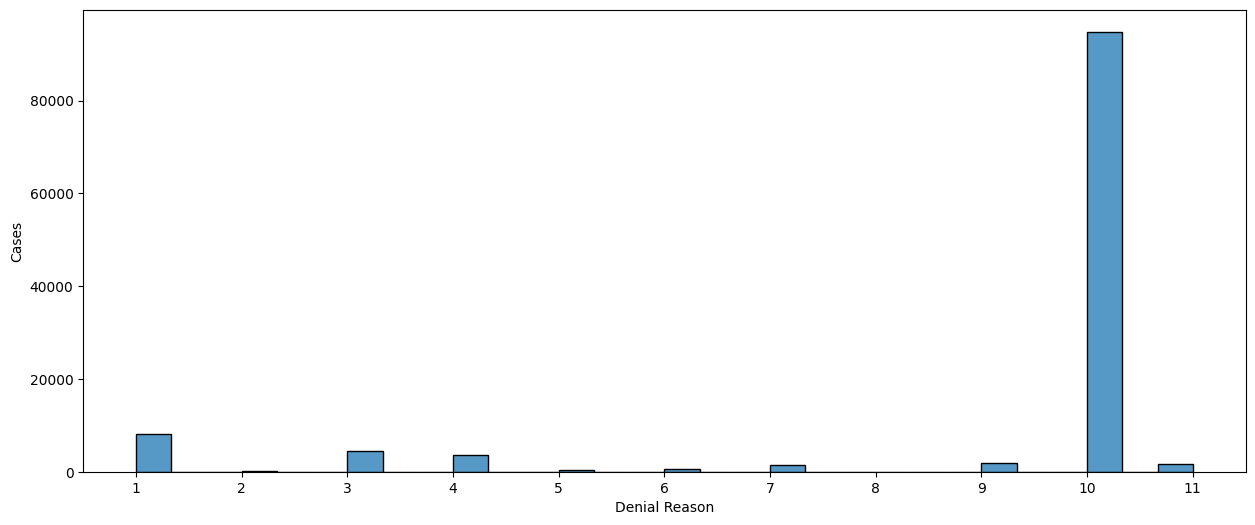

In [45]:
draw_histplot(y_test)

<Axes: >

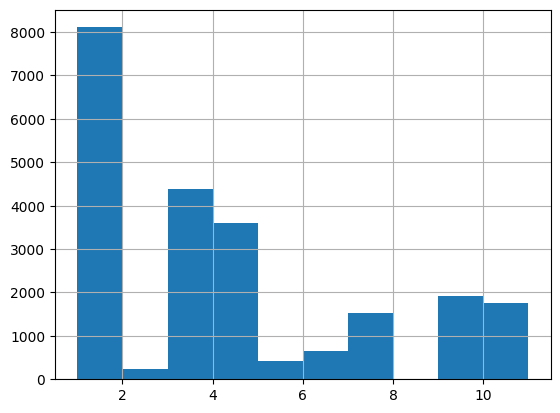

In [46]:
y_test[y_test != 10].hist()

In [47]:
rus = RandomUnderSampler(sampling_strategy={
    10:60000
}, random_state=0)
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)

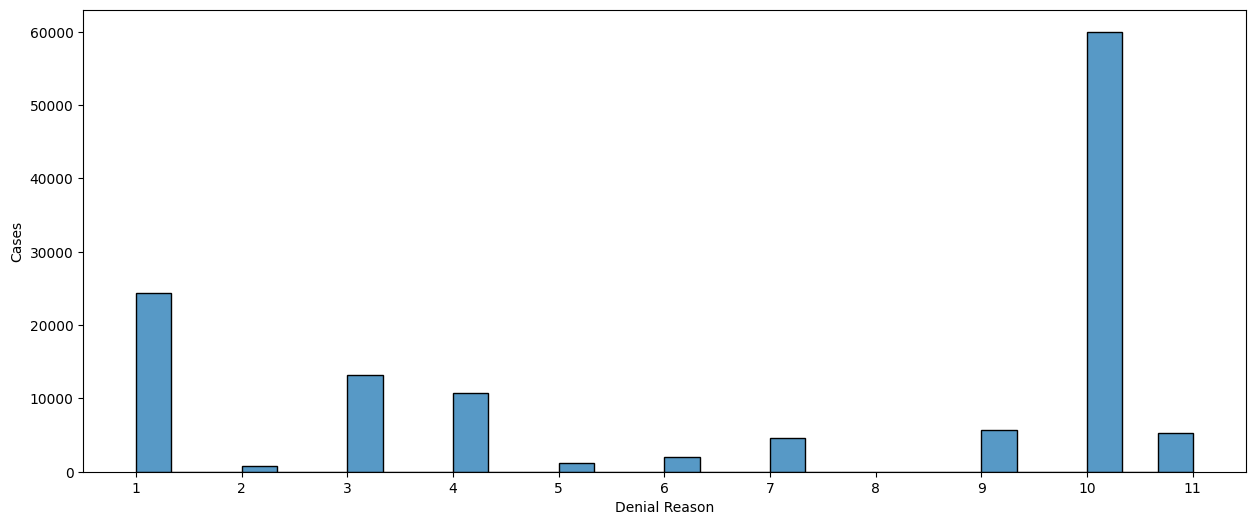

In [48]:
draw_histplot(y_rus_train)

In [49]:
y_rus_train.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [50]:
counts = {u:y_rus_train[y_rus_train == u].size for u in y_rus_train.unique()}
counts

{1: 24333,
 2: 738,
 3: 13127,
 4: 10792,
 5: 1248,
 6: 1982,
 7: 4616,
 8: 27,
 9: 5752,
 10: 60000,
 11: 5297}

In [51]:
ros = RandomOverSampler(sampling_strategy={
    1:50000,
    2:10000,
    3:50000,
    4:50000,
    5:10000,
    6:10000,
    7:30000,
    8:10000,
    9:30000,
    10:60000,
    11:30000
}, random_state=0)
X_ros_train, y_ros_train = ros.fit_resample(X_rus_train, y_rus_train)

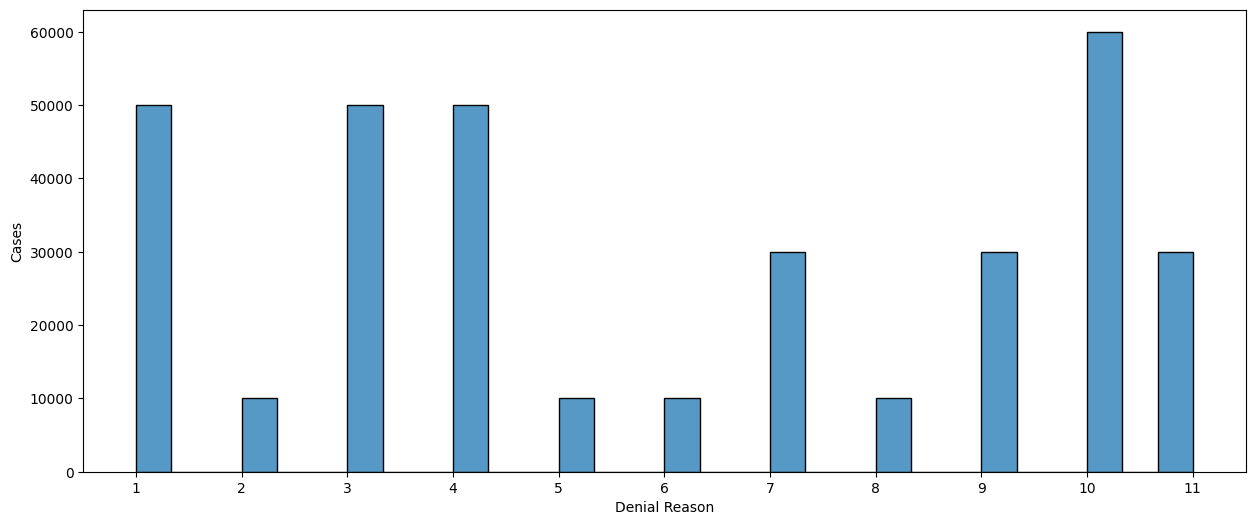

In [52]:
draw_histplot(y_ros_train)

In [53]:
rfc = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
rfc.fit(X_ros_train, y_ros_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

In [54]:
y_test

164506    10
343736    10
183026    10
157395     9
437912    10
          ..
381072    10
277460    10
304974    10
191619    10
298632    10
Name: denial_reason-1, Length: 117507, dtype: int64

In [55]:
def assess_rf_performance(estimator: RandomForestClassifier, X_test, y_test) -> None:
    y_score = estimator.predict_proba(X_test)[:, 1]
    y_pred = estimator.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"F1-score: {100 * f1:.2f}%")
    print(f"accuracy: {100 * accuracy:.2f}%")

In [56]:
assess_rf_performance(rfc, X_test, y_test)

F1-score: 91.35%
accuracy: 91.99%


In [57]:
rus = RandomUnderSampler(sampling_strategy={
    1:1000,
    3:1000,
    4:1000,
    7:1000,
    9:1000,
    10:1000,
    11:1000
}, random_state=0)
X_test_rus, y_test_rus = rus.fit_resample(X_test, y_test)

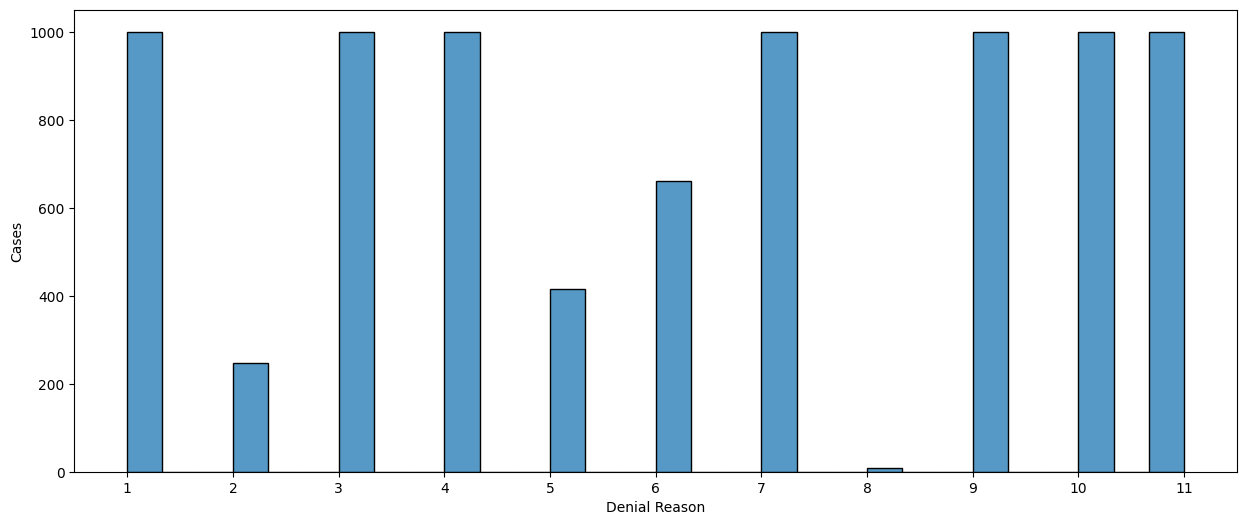

In [58]:
draw_histplot(y_test_rus)

In [59]:
ros = RandomOverSampler(sampling_strategy={
    2:800,
    5:800,
    6.:800,
    8:800
}, random_state=0)
X_test_ros, y_test_ros = ros.fit_resample(X_test_rus, y_test_rus)

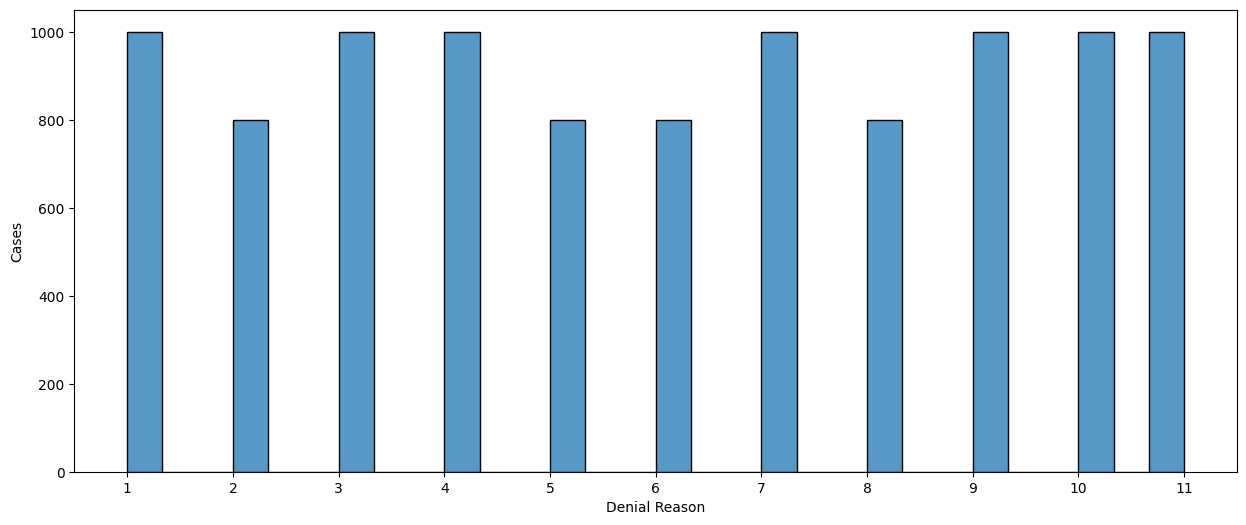

In [60]:
draw_histplot(y_test_ros)

## Undersampling ENN ## 
ONLY TRAIN SET
- ENN + hyperparameters tuning (gridsearch) on RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
- Pipeline with enn step before RFC

In [61]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import GridSearchCV

enn = EditedNearestNeighbours(sampling_strategy="majority", n_neighbors=2)

X_train_enn, y_train_enn = enn.fit_resample(X_ros_train, y_ros_train)

In [62]:
counts = {u:y_train_enn[y_train_enn == u].size for u in y_train_enn.unique()}
counts

{1: 50000,
 2: 10000,
 3: 50000,
 4: 50000,
 5: 10000,
 6: 10000,
 7: 30000,
 8: 10000,
 9: 30000,
 10: 27364,
 11: 30000}

# Oversampling ##

ONLY TRAIN SET
- SMOTE + hyperparameters tuning (gridsearch) on RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)

- Pipeline with smote step before RFC


In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



# param_grid = {
# #     "smote__k_neighbors": np.arange(1, 6),
# #     'rfc__min_samples_leaf': [1,2,3,5,7,10],
# #     'rfc__max_depth': np.arange(2, 10, 3),
# #     'rfc__n_estimators': [75, 100, 125]
#     "smote__k_neighbors": np.arange(1,2),
#     'rfc__min_samples_leaf': [3],
#     'rfc__max_depth': np.arange(2, 3),
#     'rfc__n_estimators': [100]
# }

# rfc = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
smote = SMOTE(sampling_strategy=lambda x: {2:30000,5:30000,6:30000,8:30000}, k_neighbors=5, random_state=0)

# pipeline = Pipeline(
#     [
#         ("smote", smote),
#         ("rfc", rfc)
#     ]
# )

# smote_pipeline = GridSearchCV(
#     param_grid=param_grid, estimator=pipeline, scoring="accuracy", cv=10,
#     verbose=2
# )


X_train_smote, y_train_smote = smote.fit_resample(X_train_enn, y_train_enn)

In [64]:
counts = {u:y_train_smote[y_train_smote == u].size for u in y_train_smote.unique()}
counts

{1: 50000,
 2: 30000,
 3: 50000,
 4: 50000,
 5: 30000,
 6: 30000,
 7: 30000,
 8: 30000,
 9: 30000,
 10: 27364,
 11: 30000}

In [65]:
rfc = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

In [67]:
assess_rf_performance(rfc, X_test, y_test)
assess_rf_performance(rfc, X_test_ros, y_test_ros)
assess_rf_performance(rfc, X_test_rus, y_test_rus)

F1-score: 91.50%
accuracy: 92.03%
F1-score: 38.51%
accuracy: 44.81%
F1-score: 49.65%
accuracy: 54.22%


In [379]:
# param_grid = {
#     'max_depth': [10],
# }
# gridsearch = GridSearchCV(
#     param_grid=param_grid, estimator=RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1), scoring="accuracy", cv=2, verbose=2
# )
# gridsearch.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .......................................max_depth=12; total time=   6.6s
[CV] END .......................................max_depth=12; total time=   6.7s


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=0),
             param_grid={'max_depth': [12]}, scoring='accuracy', verbose=2)

In [376]:
# gridsearch.best_params_

{'max_depth': 10}

In [380]:
#F1-score: 29.96%
#accuracy: 35.32%
# F1-score: 39.82%
# accuracy: 44.52%
# assess_rf_performance(gridsearch.best_estimator_, X_test_ros, y_test_ros)

F1-score: 38.57%
accuracy: 44.19%


In [68]:
rfc = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1, max_depth=10, min_samples_leaf=2)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, n_jobs=-1, random_state=0)

In [69]:
assess_rf_performance(rfc, X_test, y_test)
assess_rf_performance(rfc, X_test_ros, y_test_ros)
assess_rf_performance(rfc, X_train_smote, y_train_smote)

F1-score: 90.36%
accuracy: 90.10%
F1-score: 41.91%
accuracy: 46.52%
F1-score: 54.52%
accuracy: 56.35%


In [70]:
#Przetestować najpierw smote i enn a potem random over i under

In [71]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import GridSearchCV

enn = EditedNearestNeighbours(sampling_strategy="majority", n_neighbors=2)

X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)
counts = {u:y_train_enn[y_train_enn == u].size for u in y_train_enn.unique()}
counts

{1: 24333,
 2: 738,
 3: 13127,
 4: 10792,
 5: 1248,
 6: 1982,
 7: 4616,
 8: 27,
 9: 5752,
 10: 221864,
 11: 5297}

In [72]:
rus = RandomUnderSampler(sampling_strategy={
    10:30000
}, random_state=0)
X_train_rusenn, y_train_rusenn = rus.fit_resample(X_train_enn, y_train_enn)
counts = {u:y_train_rusenn[y_train_rusenn == u].size for u in y_train_rusenn.unique()}
counts

{1: 24333,
 2: 738,
 3: 13127,
 4: 10792,
 5: 1248,
 6: 1982,
 7: 4616,
 8: 27,
 9: 5752,
 10: 30000,
 11: 5297}

In [73]:
smote = SMOTE(sampling_strategy=lambda x: {
    1:30000, 
    2:5000,
    3:25000,
    4:25000,
    5:7000,
    6:10000,
    7:15000,
    8:1000,
    9:17000,
    11:15000
}, k_neighbors=5, random_state=0)
X_train_smoterusenn, y_train_smoterusenn = smote.fit_resample(X_train_rusenn, y_train_rusenn)

In [74]:
counts = {u:y_train_smoterusenn[y_train_smoterusenn == u].size for u in y_train_smoterusenn.unique()}
counts

{1: 30000,
 2: 5000,
 3: 25000,
 4: 25000,
 5: 7000,
 6: 10000,
 7: 15000,
 8: 1000,
 9: 17000,
 10: 30000,
 11: 15000}

In [75]:
ros = RandomOverSampler(sampling_strategy={
    2:25000,
    3:30000,
    4:30000,
    5:25000,
    6:30000,
    7:30000,
    8:20000,
    9:30000,
    11:30000
}, random_state=0)
X_train_final, y_train_final = ros.fit_resample(X_train_smoterusenn, y_train_smoterusenn)
counts = {u:y_train_final[y_train_final == u].size for u in y_train_final.unique()}
counts

{1: 30000,
 2: 25000,
 3: 30000,
 4: 30000,
 5: 25000,
 6: 30000,
 7: 30000,
 8: 20000,
 9: 30000,
 10: 30000,
 11: 30000}

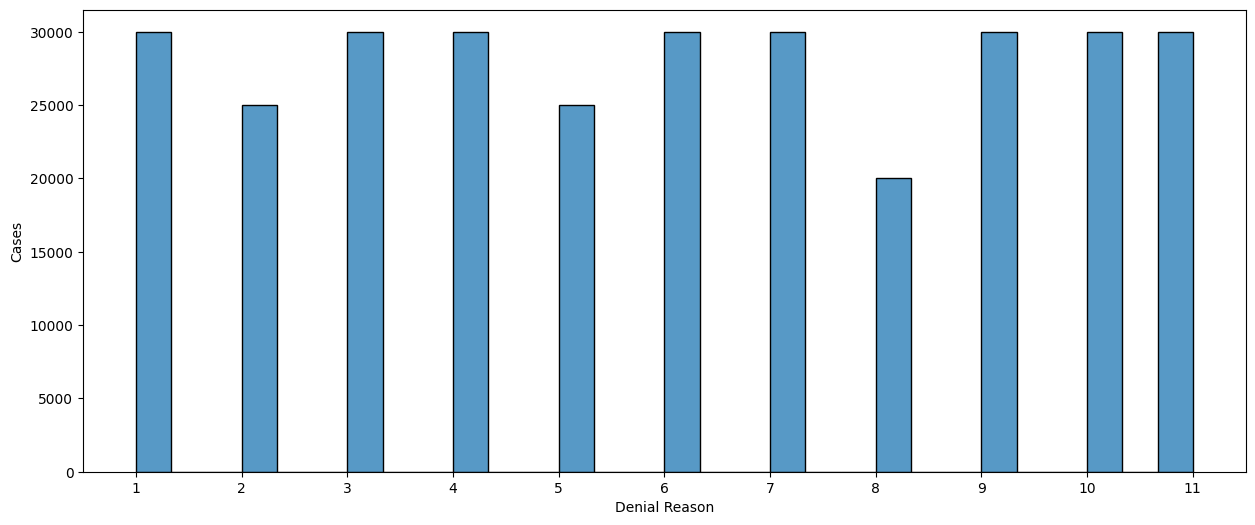

In [76]:
draw_histplot(y_train_final)

In [83]:
rfc = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1, min_samples_leaf=3)
rfc.fit(X_train_final, y_train_final)
assess_rf_performance(rfc, X_test, y_test)
assess_rf_performance(rfc, X_test_ros, y_test_ros)
assess_rf_performance(rfc, X_test_rus, y_test_rus)
assess_rf_performance(rfc, X_train_final, y_train_final)
# F1-score: 90.08%
# accuracy: 90.22%
# F1-score: 35.10%
# accuracy: 42.45%
# F1-score: 53.72%
# accuracy: 56.11%
#---1:
# F1-score: 90.35%
# accuracy: 90.39%
# F1-score: 36.47% -best
# accuracy: 42.89%
# F1-score: 53.87%
# accuracy: 56.35%
#---2:
# F1-score: 90.29%
# accuracy: 90.32%
# F1-score: 35.89%
# accuracy: 42.68%
# F1-score: 53.63%
# accuracy: 56.06%
# min_samples_leaf=1
# F1-score: 91.63%
# accuracy: 91.96%
# F1-score: 37.80%
# accuracy: 43.07%
# F1-score: 100.00%
# accuracy: 100.00%
#xxxxxxxxxxxxxxxxxxx
#leafs 1
# F1-score: 91.63%
# accuracy: 91.96%
# F1-score: 40.92%
# accuracy: 46.14%
# F1-score: 100.00%
# accuracy: 100.00%
# leafs 2
# F1-score: 91.67%
# accuracy: 91.89%
# F1-score: 42.23%
# accuracy: 47.45%
# F1-score: 53.40%
# accuracy: 56.46%
# F1-score: 99.12%
# accuracy: 99.11%

F1-score: 91.65%
accuracy: 91.83%
F1-score: 42.38%
accuracy: 47.50%
F1-score: 53.47%
accuracy: 56.44%
F1-score: 97.67%
accuracy: 97.67%


In [139]:
from sklearn.metrics import roc_auc_score


In [140]:
pred_proba = rfc.predict_proba(X_test_ros)

In [141]:
pred.shape

(117507,)

0.8519255799822242


Text(0.5, 1.0, 'ROC AUC score probablities for classes on balanced test dataset')

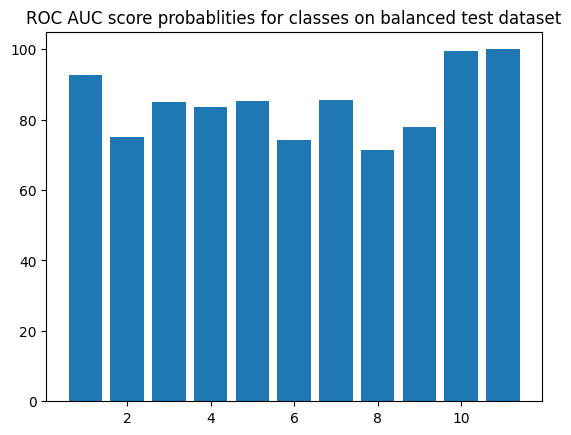

In [162]:
pred_proba = rfc.predict_proba(X_test_ros)
roc_auc_ovr = roc_auc_score(y_test_ros, pred_proba, multi_class='ovr', average=None)
print(roc_auc_score(y_test_ros, pred_proba, multi_class='ovr', average='weighted'))
plt.bar(range(1, 12), roc_auc_ovr * 100)
plt.title("ROC AUC score probablities for classes on balanced test dataset")

0.9898109640823471


Text(0.5, 1.0, 'ROC AUC score probablities for classes on non-balanced test dataset')

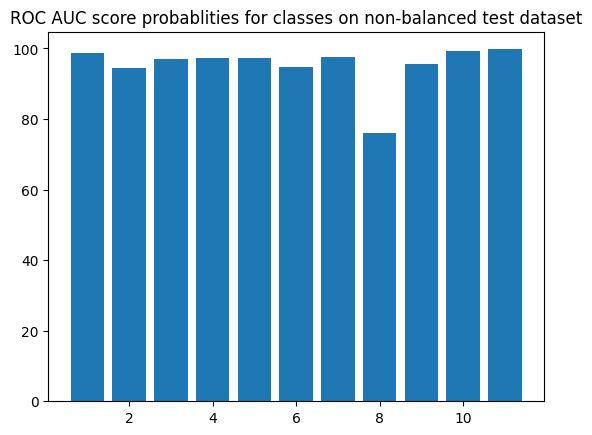

In [164]:
pred_proba = rfc.predict_proba(X_test)
roc_auc_ovr = roc_auc_score(y_test, pred_proba, multi_class='ovr', average=None)
print(roc_auc_score(y_test, pred_proba, multi_class='ovr', average='weighted'))
plt.bar(range(1, 12), roc_auc_ovr * 100)
plt.title("ROC AUC score probablities for classes on non-balanced test dataset")